- This is a side-project that will be pasted into the CombinedPull notebook when it works
- I'm iterating here for now until I can get it to work right

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
from pathlib import Path

In [2]:
folder = Path.cwd() / "Contact_Parks"

# grab all of the spreadsheets in the 'parks to contact' folder and concatenate
# each of them represents the alerts that have been flagged as a closure by AI
parks_to_contact_df = pd.concat(
    [pd.read_csv(f, parse_dates=['date']) for f in folder.iterdir() if f.suffix.lower() == ".csv"],
    ignore_index=True
    )

parks_to_contact_df.head()

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag,date
0,71F660F3-4349-41BB-9E5A-45F519FFF4D9,NaN,Norris Geyser Basin Closed,YELL,"Norris Geyser Basin, including all boardwalks,...",Park Closure,[],00:00.0,Yellowstone National Park,IMR,YELL,"ID,MT,WY",yes,2025-10-23
1,8B622055-8E8A-4C6B-BE90-8D5893C2F331,NaN,White Sands National Park Open to the Public,WHSA,White Sands National Park is now open from 9:0...,Park Closure,[],00:00.0,White Sands National Park,IMR,WHSA,NM,yes,2025-10-23
2,1E8B414E-27B9-435C-9B7F-FAFD86B96E54,NaN,Pierce Stocking Scenic Drive Temporarily Close...,SLBE,The 7.4-mile one-way loop is closed due to uns...,Park Closure,[],00:00.0,Sleeping Bear Dunes National Lakeshore,MWR,SLBE,MI,yes,2025-10-23
3,8A5D7467-9F35-4FB8-A035-AE9DA6039BA9,https://www.nps.gov/dino/learn/news/quarryexhi...,Quarry Exhibit Hall Temporary Closure,DINO,"The Quarry Exhibit Hall ""Wall of Bones"" is tem...",Park Closure,[],00:00.0,Dinosaur National Monument,IMR,DINO,"CO,UT",yes,2025-10-23
4,238A4176-5720-4AD2-A0BC-9BF3C469459B,NaN,Baker Creek Prescribed Fire Area Closure,GRBA,"The Baker Creek area, including Baker Creek Ro...",Park Closure,[],00:00.0,Great Basin National Park,PWR,GRBA,NV,yes,2025-10-23


In [3]:
parks_to_contact_df['date'] = pd.to_datetime(parks_to_contact_df['date'])

In [4]:
pivot = pd.pivot_table(
    parks_to_contact_df,
    index = 'alpha',
    columns = 'date',
    values = 'Road Closed Flag',
    aggfunc='count',
    fill_value = 0
    )
pivot

date,2025-10-23,2025-11-05,2025-12-11
alpha,,,
ABLI,1,1,0
ANJO,1,1,0
BIBE,1,1,1
BISO,1,1,1
BITH,1,1,1
...,...,...,...
WHSA,2,1,1
WICA,1,1,1
YELL,2,1,1


In [5]:
unique_parks_by_month = parks_to_contact_df.groupby(parks_to_contact_df['date'].dt.to_period('M')).agg({'alpha': 'nunique'})
unique_parks_by_month

,alpha
date,
2025-10,84
2025-11,80
2025-12,79


In [6]:
total_alerts_by_month = parks_to_contact_df.groupby(parks_to_contact_df['date'].dt.to_period('M')).agg({'Road Closed Flag': 'count'})
total_alerts_by_month

,Road Closed Flag
date,
2025-10,115
2025-11,109
2025-12,106


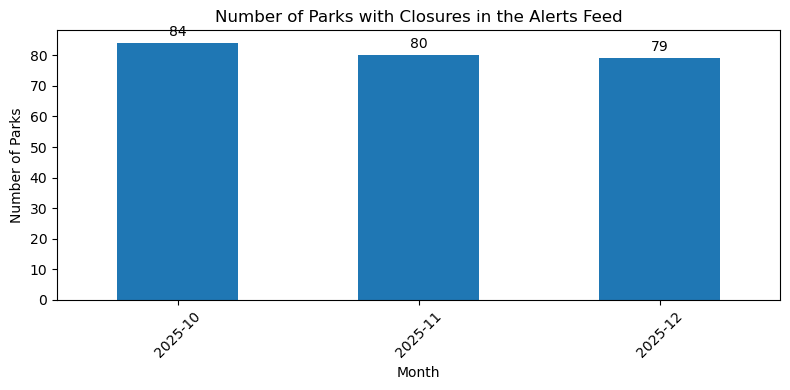

In [7]:
ax = unique_parks_by_month['alpha'].plot(kind='bar', figsize=(8,4))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Parks')
ax.set_title('Number of Parks with Closures in the Alerts Feed')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

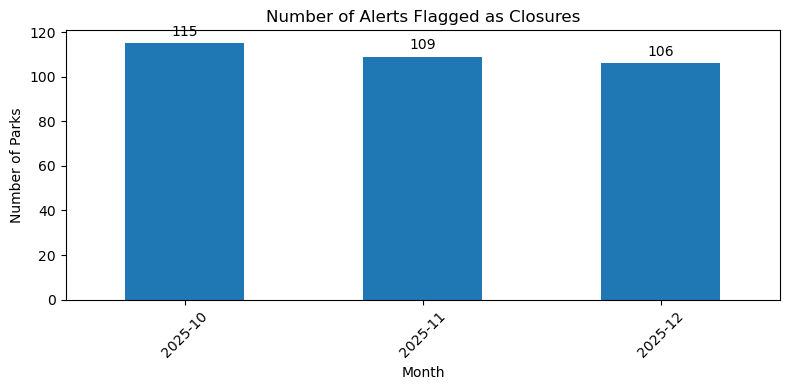

In [8]:
ax = total_alerts_by_month['Road Closed Flag'].plot(kind='bar', figsize=(8,4))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Parks')
ax.set_title('Number of Alerts Flagged as Closures')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()